# AI in Cybersecurity

### CIS6370 Project Implementation
### James Goedmakers
### Dr. Liam Mayron


### Topic Introduction

In this project, we will ...

In [2]:
#Import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

In [3]:
#load the NSL KDD dataset
data = pd.read_csv("nsl-kdd/KDDTrain+.txt")

print(data.shape)
data.head()

(125972, 43)


,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
#the csv file does not include column labels so we will have to add them manually

columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

data.columns = columns
data.columns = columns

data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [5]:
#the dataset initially comes with 20 different instance outcomes in addition to 'normal' status
data.outcome.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [143]:
#divide the dataset into inputs X and outputs y, and perform scaling on the data before training
from sklearn.preprocessing import StandardScaler

X = data.drop(['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome'],axis=1)

y = data.outcome
y.loc[y == "normal"] = 0
y.loc[y != 0] = 1
y = y.astype('int')

scaler = StandardScaler()
scaler.fit(X)
X[X.columns] = scaler.transform(X[X.columns])

X.head()

print(X.shape)
print(y.shape)

(125972, 34)
(125972,)


/tmp/ipykernel_60274/3321248441.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y == "normal"] = 0
/tmp/ipykernel_60274/3321248441.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y != 0] = 1


In [144]:
#split the data into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(94479, 34)
(94479,)
(31493, 34)
(31493,)


In [145]:
#train the logistic regression binary classifier on the training data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [164]:
#evaluate model predictions with some performance metrics, accuracy, precision, recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

predictions = model.predict(x_test)


print("Accuracy:", accuracy_score(y_test,predictions))
print("Precision:",precision_score(y_test,predictions))
print("Recall:",recall_score(y_test,predictions))


Accuracy: 0.9502746642110945
Precision: 0.9577816291161179
Recall: 0.9352196574832464


Text(0.5, 1.0, 'Security Outcome Predictions vs Actual Outcome')

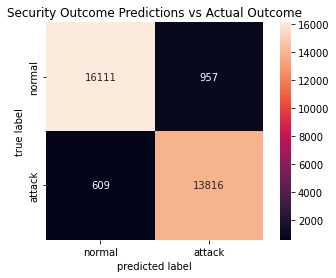

In [158]:
#visualize performance with a confusion matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=['normal','attack'], yticklabels=['normal','attack'])
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Security Outcome Predictions vs Actual Outcome')

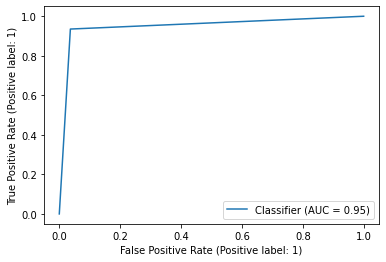

In [165]:
#visualize performance with an roc curve
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test,predictions)